<a href="https://colab.research.google.com/github/groupe11ML/groupe11ML/blob/main/kmeansG11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GROUPE 11 
# KEUFACK DONGMO BELVIANE BERENICE 19Y204
# LEUKAM FERMAT 19Y208
# LONTSI TIDOH MOREL 19Y082
# TCHAMEDEU TCHAMEDEU JORDAN STEVE 19Y458

# K-Means Clustering From Scratch en Python [Algorithme expliqué]

Dans ce tutoriel , nous allons implémenter l'algorithme de clustering K-Means à partir de zéro en utilisant le module Numpy.

Les 5 étapes de l'algorithme de clustering K-means :

Étape 1. Choisissez au hasard k points de données comme centroïdes initiaux.

Étape 2. Trouvez la distance (distance euclidienne pour notre objectif) entre chaque point de données de notre ensemble d'entraînement avec les k centroïdes.

Étape 3. Attribuez maintenant chaque point de données au centroïde le plus proche en fonction de la distance trouvée.

Étape 4. Mettez à jour l'emplacement du centroïde en prenant la moyenne des points dans chaque groupe de clusters.

Étape 5. Répétez les étapes 2 à 4 jusqu'à ce que nos centroïdes ne changent pas.

Nous pouvons choisir la valeur optimale de K (Number of Clusters) en utilisant des méthodes comme la méthode The Elbow.

Implémentation de l'algorithme de clustering K-Means

Implémentons maintenant les étapes ci-dessus dans le code. 

In [ ]:
#Importer les modules requis
 
import numpy as np
from scipy.spatial.distance import cdist 
 
#Fonction pour mettre en œuvre les étapes indiquées dans la section précédente
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Choisir au hasard des centroïdes
    centroids = x[idx, :] #Step 1
     
    #trouver la distance entre les centroïdes et tous les points de données
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centre de gravité avec la distance minimale
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Répéter les étapes ci-dessus pour un nombre défini d'itérations
    #Étape 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Mise à jour des centroïdes en prenant la moyenne du cluster auquel il appartient
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Centroïdes mis à jour
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 

La fonction ci-dessus renvoie un tableau d'étiquettes de cluster pour chaque point de données de notre ensemble d'apprentissage.

scipy.spatial.distance (calcul de distance) :Calcul de la matrice de distance à partir d'une collection de vecteurs d'observation bruts stockés dans un tableau

cdist(XA, XB[, métrique, out]) :Calculer la distance entre chaque paire des deux collections d'entrées.

Fonction numpy.vstack() :La fonction vstack() est utilisée pour empiler des tableaux en séquence verticalement (par ligne).

numpy. argmin ( a , axis=None , out=None , * , keepdims=<no value> ) : Renvoie les indices des valeurs minimales le long d'un axe.


Test des clusters K-Means
Nous utiliserons le jeu de données digits (intégré au module sklearn) pour tester notre fonction.

load digits est un dataset de classification de 1797 éléments, les chiffres...Chaque point de données est une image 8x8 d'un chiffre.

sklearn.decomposition.PCA  : Analyse en composantes principales (ACP).

Réduction de la dimensionnalité linéaire à l'aide de la décomposition en valeurs singulières des données pour les projeter dans un espace de dimension inférieure.

Paramètres:  

n_components  : Nombre de composants à conserver. si n_components n'est pas défini, tous les composants sont conservés . n_components == min(n_samples, n_features)

copy bool, par défaut=True
Si False, les données transmises à fit sont écrasées et l'exécution de fit(X).transform(X) ne donnera pas les résultats attendus

whiten bool, défaut=Faux
Lorsque Vrai (Faux par défaut), les components_vecteurs sont multipliés par la racine carrée de n_échantillons, puis divisés par les valeurs singulières pour garantir des sorties non corrélées avec des variances par composante unitaire.

Le blanchiment supprimera certaines informations du signal transformé (les échelles de variance relative des composants) mais peut parfois améliorer la précision prédictive des estimateurs  en faisant en sorte que leurs données respectent certaines hypothèses.

svd_solver {'auto', 'full', 'arpack', 'randomized'}, default='auto'
Si automatique :
Le solveur est sélectionné par une politique par défaut 

Si plein :
exécuter un SVD complet exact en appelant le solveur LAPACK 

Si arpack :
exécuter SVD tronqué à n_components en appelant le solveur ARPACK

Si aléatoire :
exécutez une SVD randomisée 

tol float, par défaut=0.0
Tolérance pour les valeurs singulières calculées par svd_solver == 'arpack'. Doit être dans la plage [0,0, infini).

iterated_power int ou 'auto', default='auto'
Nombre d'itérations pour la méthode de puissance calculée par svd_solver == 'randomized'. Doit être dans la plage [0, infini).

random_state int, instance RandomState ou None, default=None


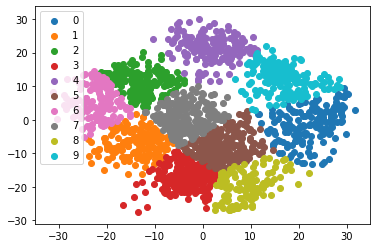

In [ ]:
#Loading the required modules
 
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
""""sklearn.cluster. KMeans ( n_clusters = 8 , * , init = 'k-means++' ,
    n_init = 10 , max_iter = 300 ,tol = 0.0001 , verbose = 0 , 
    random_state = None , copy_x = True , algorithm = 'auto' )"""
#regroupement KMEANS
import matplotlib.pyplot as plt
 
#Defining our function 
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Choisir au hasard des centroïdes
    centroids = x[idx, :] #etape 1
     
    #trouver la distance entre les centroïdes et tous les points de données
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centre de gravité avec la distance minimale
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Répéter les étapes ci-dessus pour un nombre défini d'itérations
    #Étape 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            ##Mise à jour des centroïdes en prenant la moyenne du cluster auquel il appartient
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Centroïdes mis à jour
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 
 
 
#Charger les données
data = load_digits().data
pca = PCA(2)
  
#Transform the data
df = pca.fit_transform(data)
 
#Applying our function
label = kmeans(df,10,1000)
 
#Visualize the results
 
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

# Conclusion
Dans cet article, nous avons créé un algorithme de clustering K-Means à partir de zéro en utilisant Python. Nous avons également couvert les étapes de création de l'algorithme K-Means et enfin testé notre implémentation sur le jeu de données Digits.Nous avons regroupé les clusters des chiffres entre eux